In [35]:
import pandas as pd
filepath=r"C:\Users\husky\Desktop\owid-covid-data.csv"
df=pd.read_csv(filepath)

In [36]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [37]:
df.shape

(429435, 67)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [105]:
# Calcolo dei casi totali per continente
casi_continente=df.groupby('continent')['new_cases'].sum()
casi_continente

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

In [217]:
# eliminare dati nulli
df = df.dropna(subset=['new_cases'])


# Calcolo del totale mondiale
totale_mondiale = casi_continente.sum()

# Percentuale di casi per continente
percentuale_casi_continente = (casi_continente / totale_mondiale) * 100
#risultato arrotondato
percentuale_casi_continente=(percentuale_casi_continente.round(2)).astype(str)+'%'

print(percentuale_casi_continente)


continent
Africa            1.69%
Asia             38.86%
Europe            32.6%
North America    16.04%
Oceania           1.93%
South America     8.87%
Name: new_cases, dtype: object


In [334]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')#trasformo la colonna 'date' in formato datetime
# Seleziona i dati relativi all'Italia nel 2022
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]
#rimuovere i dati che non hanno misurazioni 
df_italia_2022 = df_italia_2022[df_italia_2022['new_cases'] > 0]

df_italia_2022.sample(5)




,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186220,ITA,Europe,Italy,2022-08-07,21286771.0,283998.0,40571.143,173062.0,1059.0,151.286,...,27.8,NaN,3.18,83.51,0.892,59037472,212137.58,12.57,24.28,3593.2700
186080,ITA,Europe,Italy,2022-03-20,13800179.0,477051.0,68150.143,157692.0,910.0,130.000,...,27.8,NaN,3.18,83.51,0.892,59037472,179598.19,12.35,6.79,3042.1050
186227,ITA,Europe,Italy,2022-08-14,21480076.0,193305.0,27615.000,173982.0,920.0,131.429,...,27.8,NaN,3.18,83.51,0.892,59037472,213148.48,12.54,8.33,3610.3930
186255,ITA,Europe,Italy,2022-09-11,22035717.0,110644.0,15806.286,176175.0,373.0,53.286,...,27.8,NaN,3.18,83.51,0.892,59037472,217456.70,12.47,11.34,3683.3674
186115,ITA,Europe,Italy,2022-04-24,16079209.0,419374.0,59910.571,162609.0,1007.0,143.857,...,27.8,NaN,3.18,83.51,0.892,59037472,185829.89,12.26,9.59,3147.6600


<Axes: xlabel='date', ylabel='total_cases'>

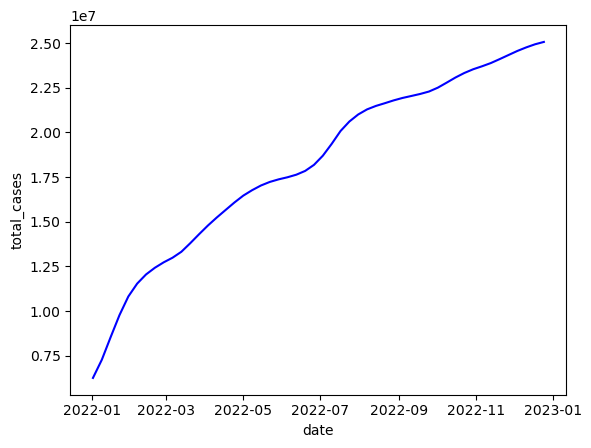

In [330]:
import seaborn as sns

# grafico per l'evoluzione dei casi totali
sns.lineplot(data=df_italia_2022, x='date', y='total_cases', color='blue')


<Axes: xlabel='date', ylabel='new_cases'>

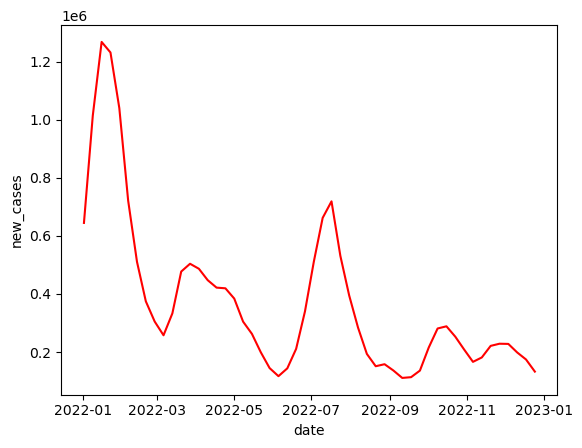

In [332]:
 #grafico per il numero di nuovi casi
sns.lineplot(data=df_italia_2022, x='date', y='new_cases', color='red')

In [358]:
# dati fliltrati per Italia, Germania e Francia nel periodo richiesto
df_filtered = df[(df['location'].isin(['Italy', 'Germany', 'France'])) &
                 (df['date'] >= '2022-05-01') &
                 (df['date'] <= '2023-04-30')]

# giorni senza misurazioni (NaN) rimossi per la colonna 'icu_patients'
df_filtered = df_filtered.dropna(subset=['icu_patients'])


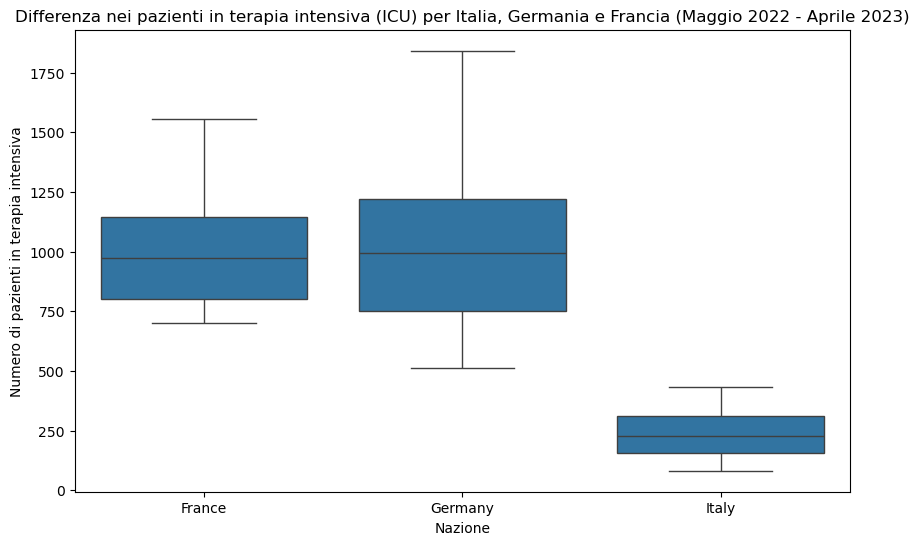

La differenza tra i paesi potrebbe essere attribuita a diversi fattori, 
come la popolazione, le politiche sanitarie, i criteri 
di ricovero in ICU e le dinamiche specifiche del sistema sanitario di ciascun paese.


In [553]:

import matplotlib.pyplot as plt
# Creazione del boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_filtered)
# Titolo e etichette
plt.title('Differenza nei pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.show()
print("""La differenza tra i paesi potrebbe essere attribuita a diversi fattori, 
come la popolazione, le politiche sanitarie, i criteri 
di ricovero in ICU e le dinamiche specifiche del sistema sanitario di ciascun paese.""")

In [551]:
# dati filtrati per Italia, Germania, Francia e Spagna nel 2023
df_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &
             (df['date'] >= '2023-01-01') &
             (df['date'] <= '2023-12-31')]

# Calcolo della somma dei pazienti ospedalizzati per ogni paese
somma_ospedalizzati_settimanali = df_2023.groupby('location')['weekly_hosp_admissions'].sum()

# Mostriamo i risultati
print(somma_ospedalizzati_settimanali)

# Verifica della presenza di valori nulli (NaN) per la colonna 'weekly_hosp_admissions'
valori_nulli = df_2023['weekly_hosp_admissions'].isna().sum()

# Commento sulla gestione dei dati nulli
print("""Poiché i valori di weekly_hosp_admissions rappresentano totali settimanali, non è opportuno 
sostituire i dati nulli. I valori mancanti riflettono semplicemente la natura del dataset (misurazioni settimanali)
o eventuali mancanze nella raccolta dei dati.""")


location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64
Poiché i valori di weekly_hosp_admissions rappresentano totali settimanali, non è opportuno 
sostituire i dati nulli. I valori mancanti riflettono semplicemente la natura del dataset (misurazioni settimanali)
o eventuali mancanze nella raccolta dei dati.


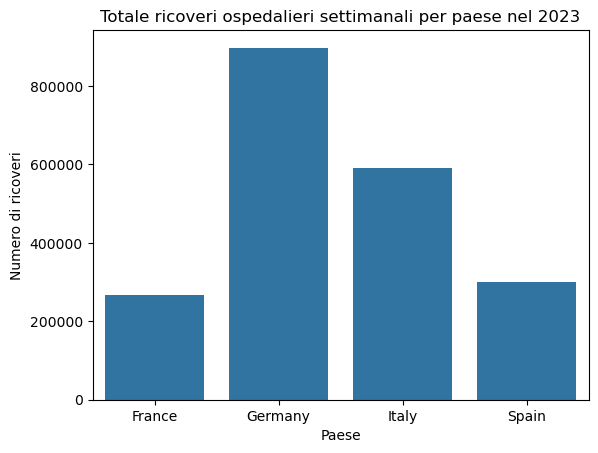

In [386]:
# dati rappresentati su grafico a barre
sns.barplot(x='location', y='weekly_hosp_admissions', data=df_2023.groupby('location')['weekly_hosp_admissions'].sum().reset_index())
plt.title('Totale ricoveri ospedalieri settimanali per paese nel 2023')
plt.xlabel('Paese')
plt.ylabel('Numero di ricoveri')
plt.show()